In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift, estimate_bandwidth
from skimage.util import random_noise


In [2]:
# Upload image in Colab or place in same folder for Jupyter
img = cv2.imread('peppers.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


In [3]:
noisy_gray = random_noise(gray, mode='gaussian', var=0.01)
noisy_gray = (255 * noisy_gray).astype(np.uint8)


In [4]:
_, global_thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)


In [5]:
local_thresh = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,
    11, 2
)


In [6]:
adaptive_thresh = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11, 2
)


In [7]:
def kmeans_segmentation(image, k):
    pixel_vals = image.reshape((-1, 3))
    pixel_vals = np.float32(pixel_vals)

    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pixel_vals)

    centers = np.uint8(kmeans.cluster_centers_)
    segmented = centers[labels]
    segmented_image = segmented.reshape(image.shape)

    return segmented_image


In [8]:
k2 = kmeans_segmentation(img, 2)
k3 = kmeans_segmentation(img, 3)
k4 = kmeans_segmentation(img, 4)


In [9]:
reshaped_img = img.reshape((-1, 3))
scaler = StandardScaler()
reshaped_scaled = scaler.fit_transform(reshaped_img)

bandwidth = estimate_bandwidth(reshaped_scaled, quantile=0.1, n_samples=1000)

meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift.fit(reshaped_scaled)

labels = meanshift.labels_
segmented_ms = reshaped_img.copy()
segmented_ms = segmented_ms.reshape(img.shape)


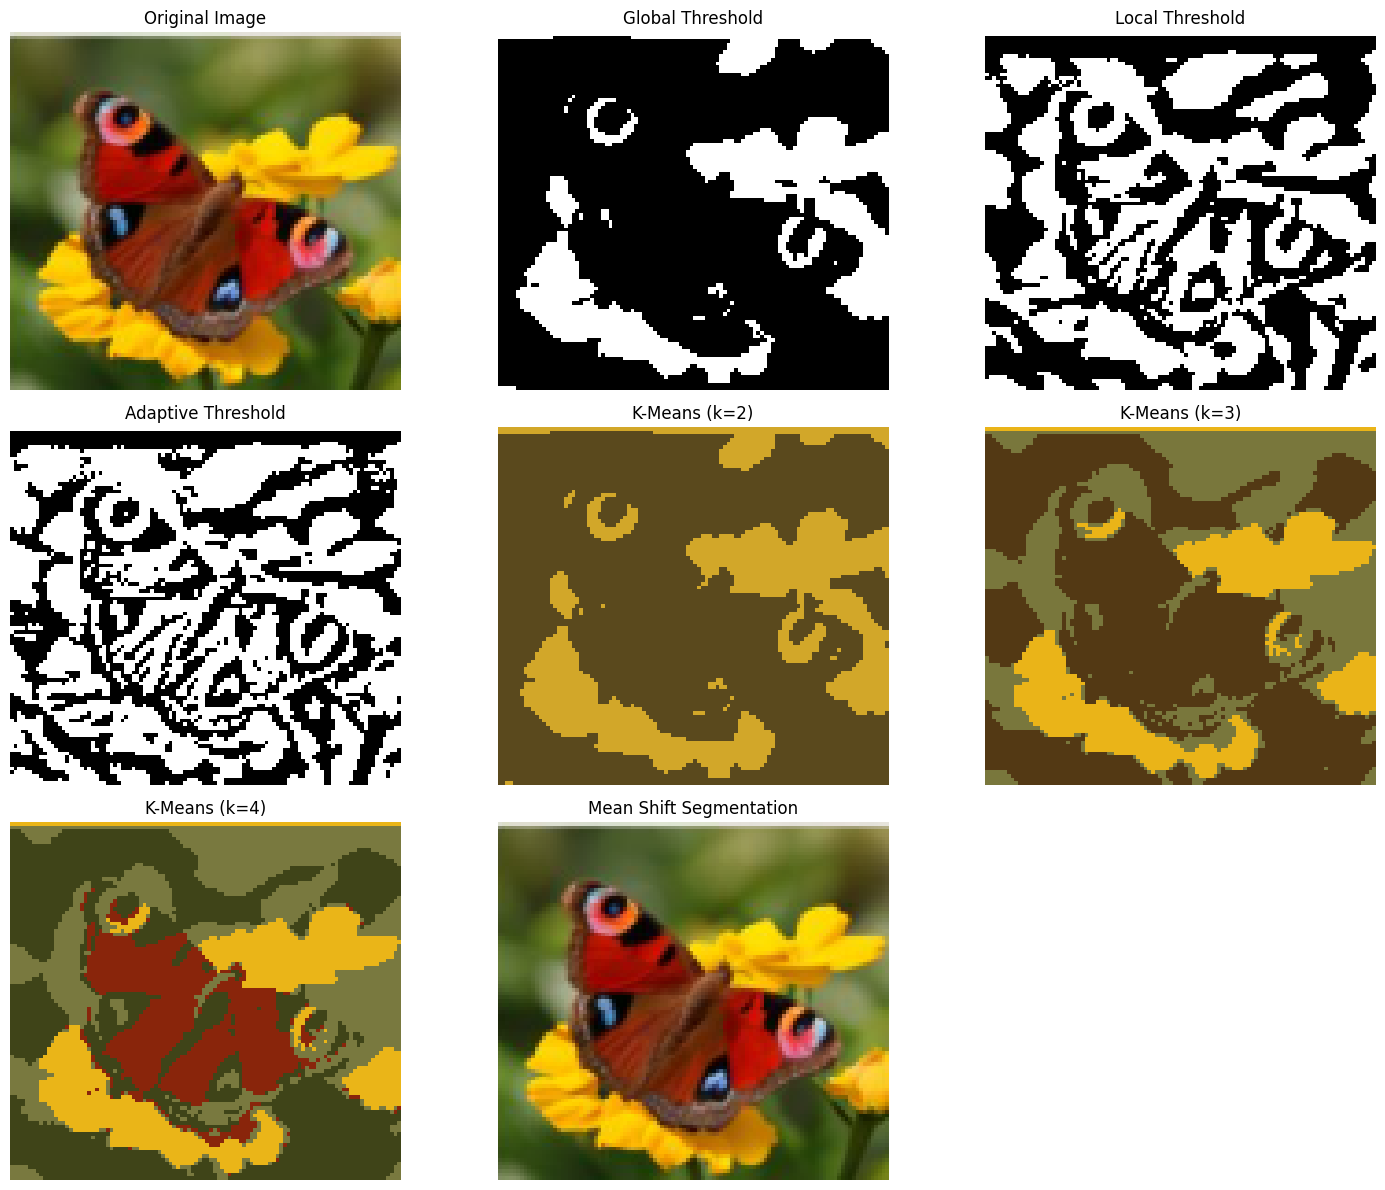

In [10]:
plt.figure(figsize=(15, 12))

plt.subplot(3, 3, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(global_thresh, cmap='gray')
plt.title("Global Threshold")
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(local_thresh, cmap='gray')
plt.title("Local Threshold")
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Threshold")
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(k2)
plt.title("K-Means (k=2)")
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(k3)
plt.title("K-Means (k=3)")
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(k4)
plt.title("K-Means (k=4)")
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(segmented_ms)
plt.title("Mean Shift Segmentation")
plt.axis('off')

plt.tight_layout()
plt.show()
